<font color='Green' size="6"> Bike Sharing Assignment</font>

## Problem statement
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.
 
#### The company wants to know:
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

#### Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## 

In [1584]:
# Remove Warnings

import warnings
warnings.filterwarnings('ignore')

### Importing all the necessary libraries

In [1585]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score# Read the data from csv file

df = pd.read_csv('day.csv')

# 

<font color='green' size="6"> Step 1: Reading and Understanding the Data </font>

In [1586]:
df = pd.read_csv('day.csv')

In [1587]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1588]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [1589]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Since the difference between mean and median is not much , we can conclude that data has no outliers

## 1. Checking for any null values

In [1590]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### inference: there is no null values.

## 2. checking for any duplicates value

In [1591]:
df.shape

(730, 16)

In [1592]:
df.drop_duplicates(inplace= True)

In [1593]:
df.shape

(730, 16)

### 3. dropping the unwanted columns

In [1594]:
# instant has only index for the row, dteday has date which can be compensated by year and month column,
# casual and registered seems to be the breakup by category for cnt column.
df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

#### inference: there is no change in the shape, it means that there is no duplicate value in the dataset

# 

<font color='green' size="6"> Step 2: EDA</font>

In [1595]:
#changing categorical data which were primarily numeric to more meaningful one
df.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"},inplace = True)

df.weathersit.replace({1:'good',2:'moderate',3:'bad',4:'severe'},inplace = True)

df.mnth = df.mnth.replace({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})
df.weekday = df.weekday.replace({0: 'tue',1: 'wed',2: 'thu',3: 'fri',4: 'sat',5: 'sun',6: 'mon'})
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,mon,0,moderate,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,tue,0,moderate,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,wed,1,good,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,thu,1,good,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,fri,1,good,9.305237,11.46350,43.6957,12.522300,1600


# 

<font color='green' size="6"> Step 2: Visualizing the Data</font>

### 1. Visualizing numerical columns

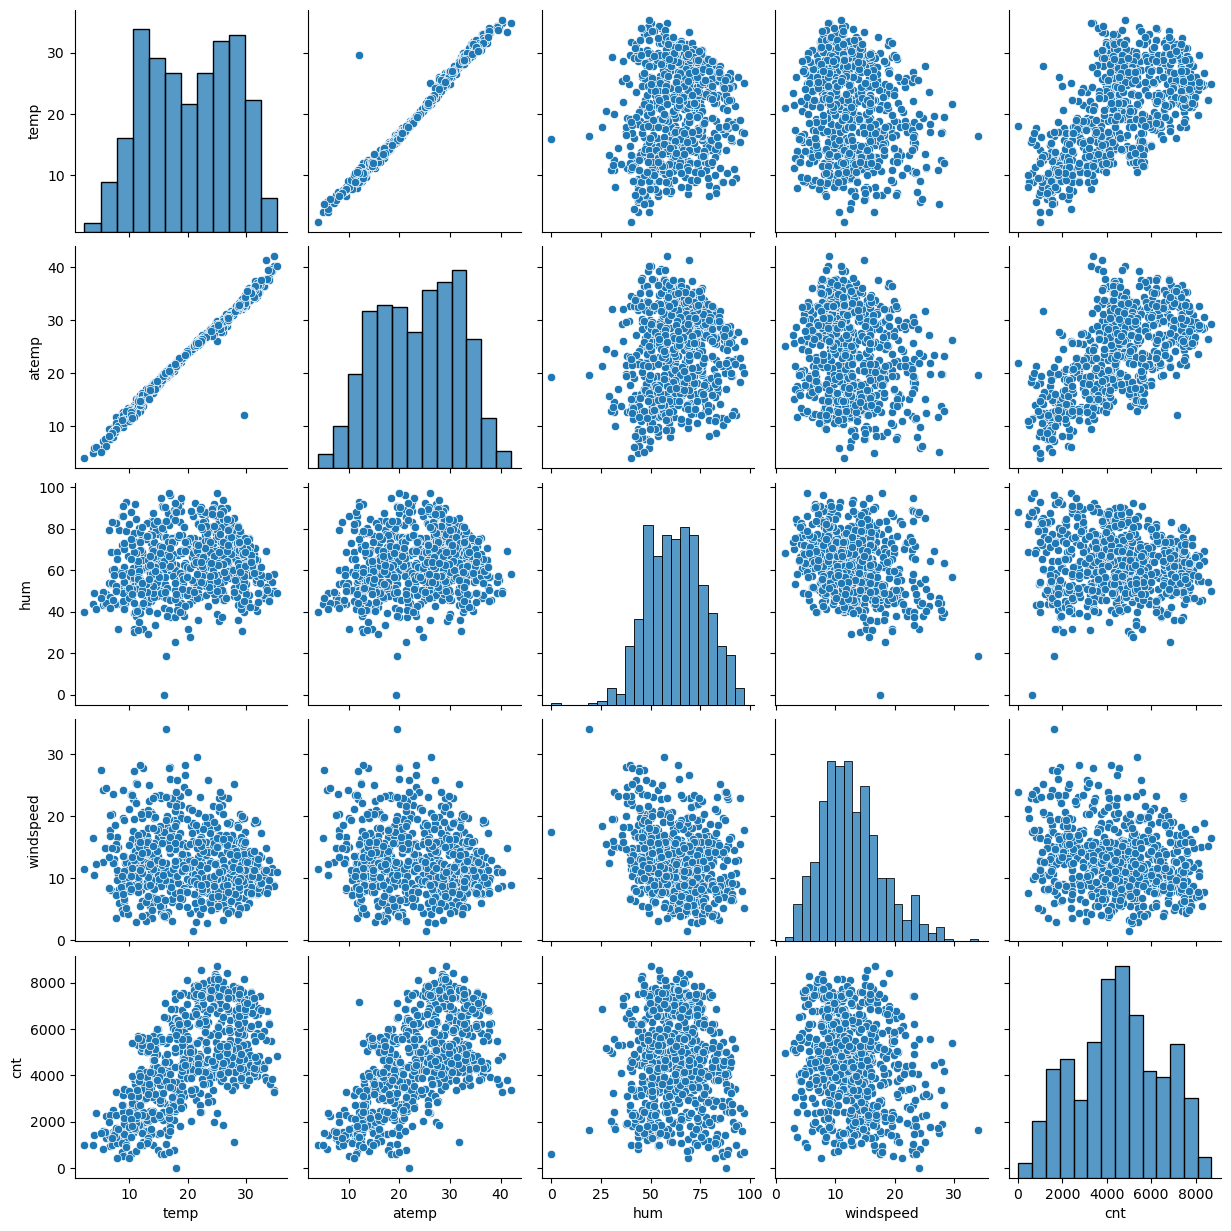

In [1596]:
sns.pairplot(df[['temp', 'atemp', 'hum', 'windspeed', 'cnt''']])
plt.show()

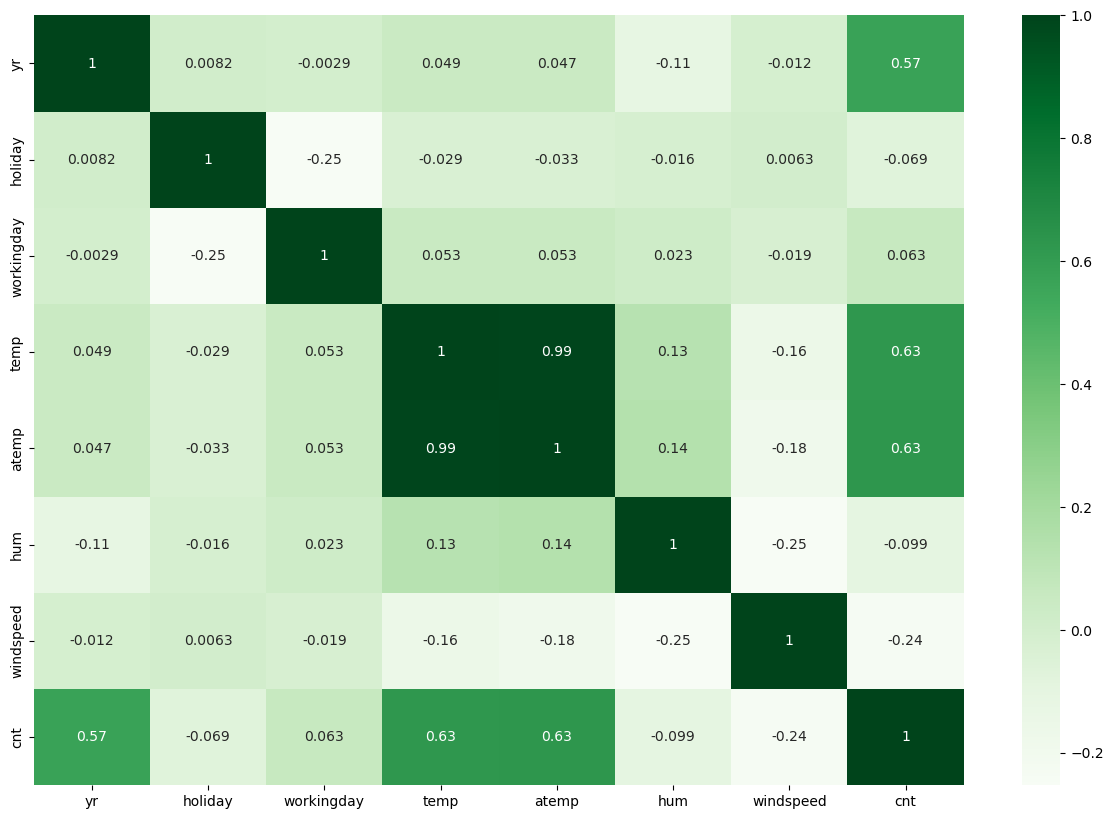

In [1597]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), cmap='Greens', annot=True)
plt.show()

#### inference: there is a strong correlation between temp and atemp. thus, using both will lead to multicollinearity. hence we will use one of the parameters only.

In [1598]:
df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

### 2. visualizing categorical columns

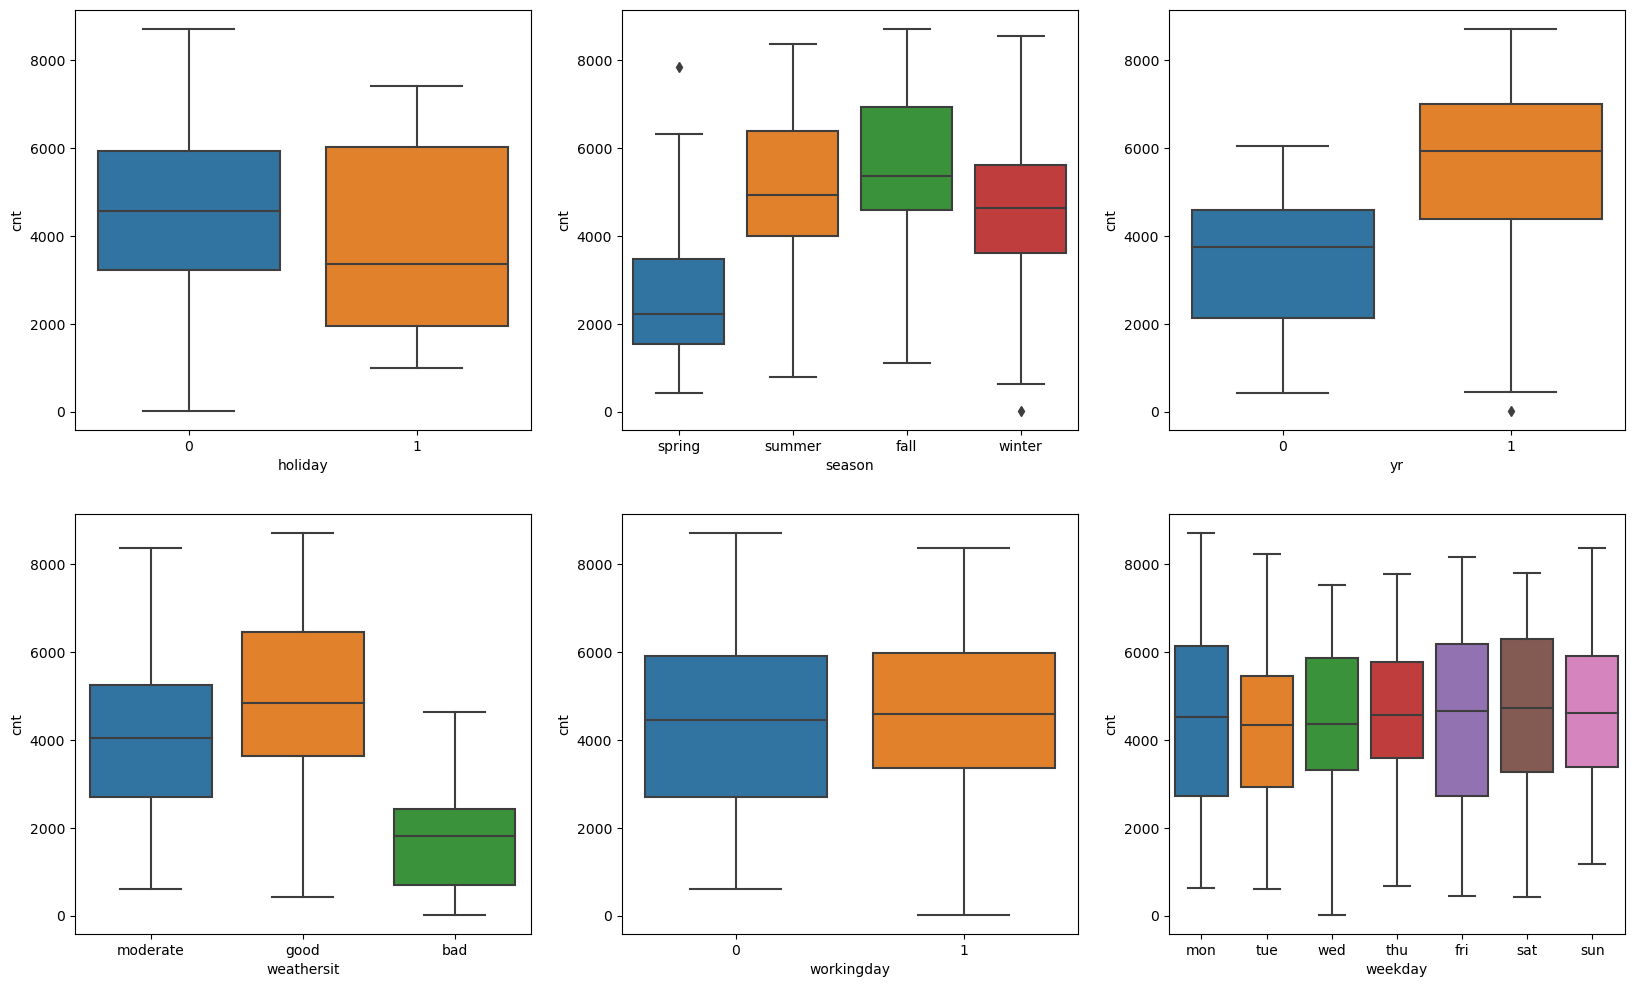

In [1599]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'yr', y = 'cnt', data = df)
plt.subplot(2,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.subplot(2,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(2,3,6)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.show()

# 

<font color='green' size="6"> Step 4: Data preparation</font>

### 1. Dummy variable for weathersit, season, weekday, month

In [1600]:
df = pd.get_dummies(data=df,columns=["season","mnth","weekday", "weathersit"],drop_first=True)
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,1,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,1,0


In [1601]:
df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun', 'mnth_mar',
       'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept', 'weekday_mon',
       'weekday_sat', 'weekday_sun', 'weekday_thu', 'weekday_tue',
       'weekday_wed', 'weathersit_good', 'weathersit_moderate'],
      dtype='object')

### 2.  splitting dataset into Train and Test data

In [1602]:
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [1603]:
df_train.shape

(510, 30)

In [1604]:
df.shape

(730, 30)

In [1605]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,...,1,0,0,0,0,1,0,0,1,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,1,0,0,1,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,0,0,1,0,0,0,0,0,0,1
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,0,0,0,0,0,0,1,0,1,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,1,0,0,0,0,0,0,1


### 3. Rescalling the features

In [1606]:
scaler = MinMaxScaler()

In [1608]:
num_vars = ['temp','atemp','hum','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

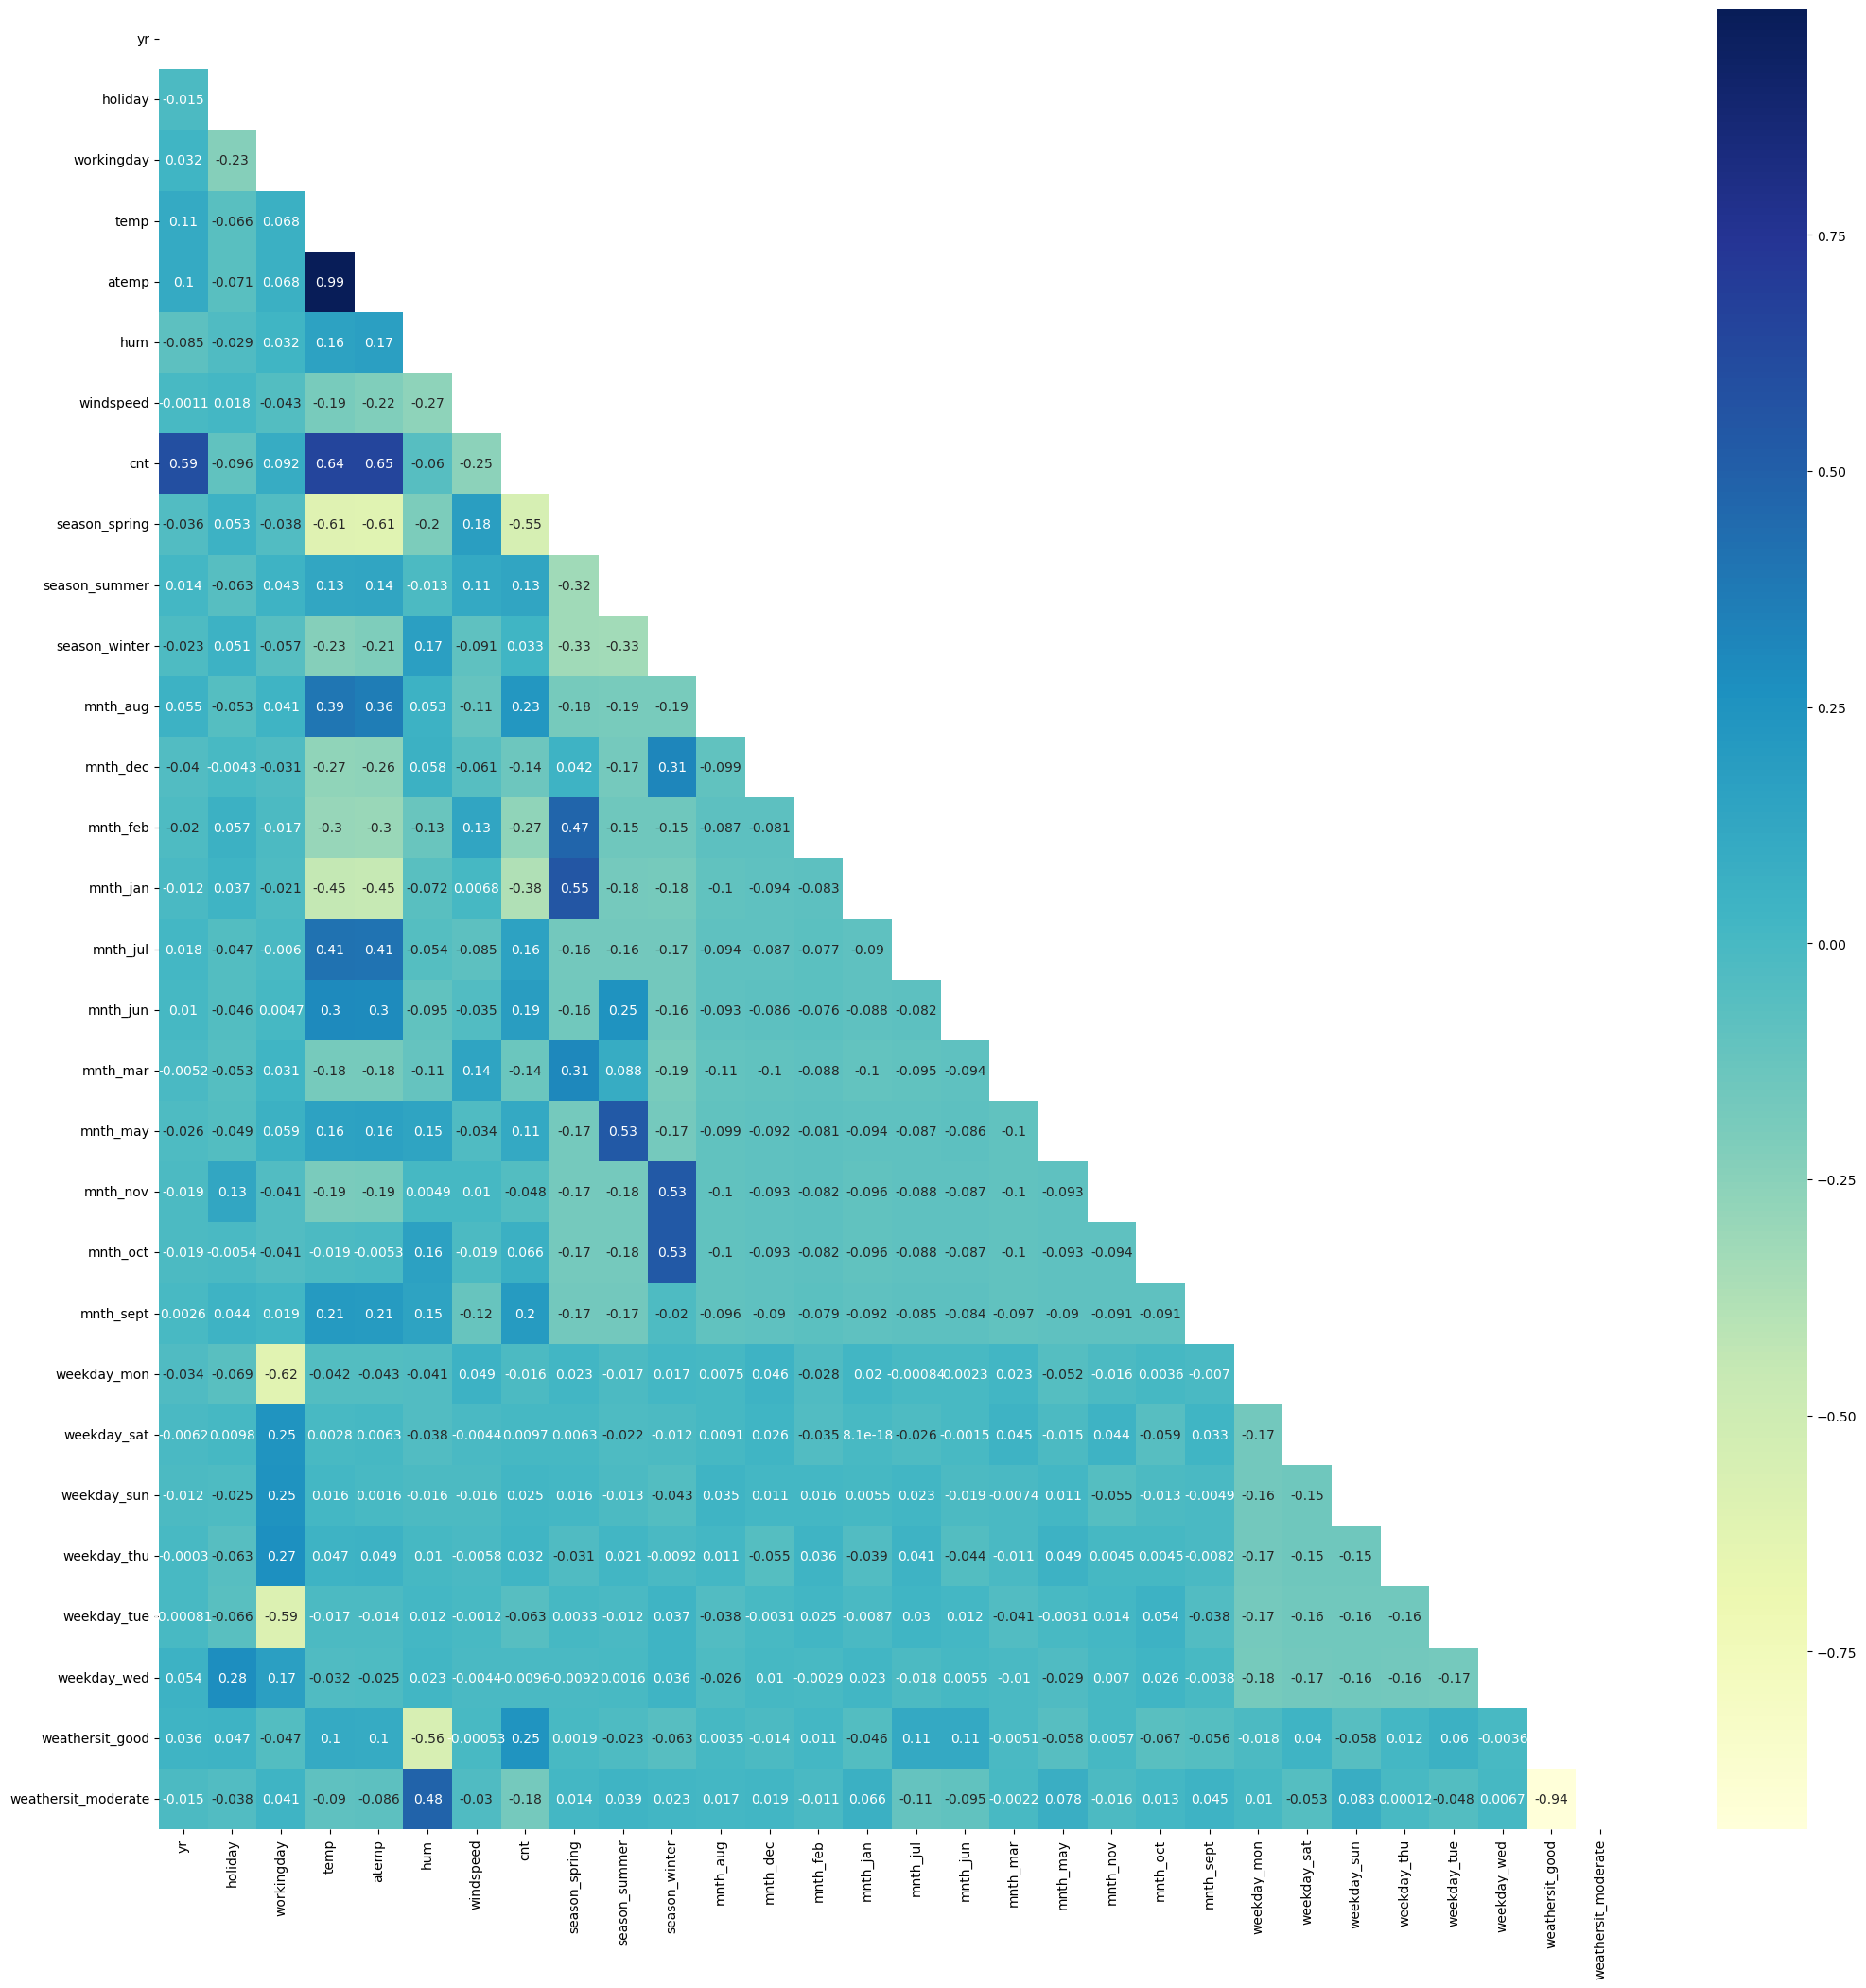

In [1609]:
plt.figure(figsize = (25, 25))
matrix = np.triu(df_train.corr())
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu", mask=matrix)
plt.show()

### inference: cnt has a good correlation with temp, winter season has a good correlation with month oct and nov, and humidity with moderate weather , january month with spring.

### 4. Dividing into X and Y sets for the model building

In [1611]:
y_train = df_train.pop('cnt')
X_train = df_train

# 

<font color='green' size="6"> Step 5: Building a Linear model using RFE</font>

### 1.Model 1

In [1612]:
lm =LinearRegression()

In [1613]:
lm.fit(X_train, y_train)

LinearRegression()

In [1614]:
rfe = RFE(lm, n_features_to_select=15)

In [1615]:
rfe = rfe.fit(X_train, y_train)

In [1616]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 7),
 ('mnth_dec', False, 3),
 ('mnth_feb', False, 4),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 14),
 ('mnth_mar', False, 15),
 ('mnth_may', False, 6),
 ('mnth_nov', False, 2),
 ('mnth_oct', False, 12),
 ('mnth_sept', True, 1),
 ('weekday_mon', True, 1),
 ('weekday_sat', False, 13),
 ('weekday_sun', False, 11),
 ('weekday_thu', False, 10),
 ('weekday_tue', False, 8),
 ('weekday_wed', False, 9),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

In [1617]:
col= X_train.columns[rfe.support_]

In [1618]:
X_train_rfe = X_train[col]

In [1619]:
X_train= X_train.columns[~rfe.support_]

In [1620]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [1621]:
lm = sm.OLS(y_train, X_train_rfe).fit()

In [1622]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Tue, 11 Apr 2023   Prob (F-statistic):          2.31e-191
Time:                        11:17:15   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0023      0.048      0.047      0.963      -0.093       0.097
yr                      0.2305      0.008     28.807      0.000       0.215       0.246
holiday                -0.0585      0.027     -2.178      0.030      -0.111      -0.006
workingday              0.0435      0.012      3.781      0.000       0.021       0.066
temp                    0.5098      0.034     14.851      0.000       0.442       0.577
hum                    -0.1547      0.037     -4.145      0.000      -0.228      -0.081
windspeed              -0.1860      0.025     -7.301      0.000      -0.236      -0.136
season_spring          -0.0508      0.021     -2.461      0.014      -0.091      -0.010
season_summer           0.0497      0.015      3.346      0.001       0.020       0.079
season_winter           0.0944      0.017      5.479      0.000       0.061       0.128
mnth_jan               -0.0343      0.017     -1.980      0.048      -0.068      -0.000
mnth_jul               -0.0532      0.018     -2.947      0.003      -0.089      -0.018
mnth_sept               0.0812      0.016      4.934      0.000       0.049       0.114
weekday_mon             0.0537      0.014      3.707      0.000       0.025       0.082
weathersit_good         0.2488      0.026      9.560      0.000       0.198       0.300
weathersit_moderate     0.1910      0.025      7.750      0.000       0.143       0.239
==============================================================================
Omnibus:                       66.344   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.565
Skew:                          -0.676   Prob(JB):                     8.25e-36
Kurtosis:                       5.403   Cond. No.                         28.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 2. checking vif

In [1623]:
def checkvif(df):
    vif= pd.DataFrame()
    vif['Features']=df.columns 
    vif['VIF']= [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF']= round(vif['VIF'], 2)
    vif= vif.sort_values(by= "VIF", ascending=False)
    return vif

In [1624]:
checkvif(X_train_rfe)

,Features,VIF
0,const,151.35
14,weathersit_good,10.26
15,weathersit_moderate,8.87
7,season_spring,5.08
4,temp,3.89
9,season_winter,3.60
8,season_summer,2.64
5,hum,1.92
3,workingday,1.88
13,weekday_mon,1.78


### We generally want a VIF that is less than 5. So there are clearly some variables we need to drop.

In [1625]:
# removing const and then checking the vif
X_train_new = X_train_rfe.drop(['const'], axis=1)

In [1626]:
checkvif(X_train_new)

,Features,VIF
4,hum,25.64
3,temp,22.83
13,weathersit_good,14.85
14,weathersit_moderate,9.02
6,season_spring,5.69
2,workingday,5.42
5,windspeed,4.68
8,season_winter,4.14
7,season_summer,3.20
0,yr,2.10


In [1627]:
# since hum has very high vif, lets remove and see if there is any change in vif levels
X_train_new1 = X_train_new.drop(['hum'], axis=1)

In [1628]:
checkvif(X_train_new1)

,Features,VIF
12,weathersit_good,14.84
3,temp,13.95
13,weathersit_moderate,8.43
2,workingday,5.34
4,windspeed,4.67
5,season_spring,4.48
6,season_summer,2.77
7,season_winter,2.76
0,yr,2.08
11,weekday_mon,1.99


## 3. model 2

In [1629]:
X_train_new1 = sm.add_constant(X_train_new1)
lm = sm.OLS(y_train, X_train_new1).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.3
Date:                Tue, 11 Apr 2023   Prob (F-statistic):          7.33e-189
Time:                        11:17:16   Log-Likelihood:                 511.16
No. Observations:                 510   AIC:                            -992.3
Df Residuals:                     495   BIC:                            -928.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1181      0.039     -3.007      0.003      -0.195      -0.041
yr                      0.2344      0.008     29.019      0.000       0.218       0.250
holiday                -0.0562      0.027     -2.058      0.040      -0.110      -0.003
workingday              0.0465      0.012      3.983      0.000       0.024       0.069
temp                    0.4728      0.034     14.037      0.000       0.407       0.539
windspeed              -0.1563      0.025     -6.292      0.000      -0.205      -0.107
season_spring          -0.0597      0.021     -2.861      0.004      -0.101      -0.019
season_summer           0.0434      0.015      2.890      0.004       0.014       0.073
season_winter           0.0797      0.017      4.650      0.000       0.046       0.113
mnth_jan               -0.0389      0.018     -2.215      0.027      -0.073      -0.004
mnth_jul               -0.0482      0.018     -2.635      0.009      -0.084      -0.012
mnth_sept               0.0753      0.017      4.522      0.000       0.043       0.108
weekday_mon             0.0584      0.015      3.980      0.000       0.030       0.087
weathersit_good         0.2917      0.024     12.027      0.000       0.244       0.339
weathersit_moderate     0.2091      0.025      8.487      0.000       0.161       0.258
==============================================================================
Omnibus:                       67.959   Durbin-Watson:                   2.066
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.078
Skew:                          -0.690   Prob(JB):                     8.64e-37
Kurtosis:                       5.431   Cond. No.                         23.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1630]:
# removing month_jan as it has high p_value and negative correlation
X_train_new2 = X_train_new1.drop(['const','mnth_jan'], axis=1)

In [1631]:
checkvif(X_train_new2)

,Features,VIF
11,weathersit_good,14.47
3,temp,13.41
12,weathersit_moderate,8.16
2,workingday,5.32
4,windspeed,4.63
5,season_spring,4.16
6,season_summer,2.77
7,season_winter,2.74
0,yr,2.08
10,weekday_mon,1.99


## model 3

In [1632]:
X_train_new2 = sm.add_constant(X_train_new2)
lm = sm.OLS(y_train, X_train_new2).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.0
Date:                Tue, 11 Apr 2023   Prob (F-statistic):          5.73e-189
Time:                        11:17:17   Log-Likelihood:                 508.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     496   BIC:                            -930.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.1328      0.039     -3.418      0.001      -0.209      -0.056
yr                      0.2336      0.008     28.839      0.000       0.218       0.250
holiday                -0.0571      0.027     -2.085      0.038      -0.111      -0.003
workingday              0.0463      0.012      3.947      0.000       0.023       0.069
temp                    0.4920      0.033     15.056      0.000       0.428       0.556
windspeed              -0.1491      0.025     -6.032      0.000      -0.198      -0.101
season_spring          -0.0653      0.021     -3.139      0.002      -0.106      -0.024
season_summer           0.0465      0.015      3.101      0.002       0.017       0.076
season_winter           0.0859      0.017      5.058      0.000       0.053       0.119
mnth_jul               -0.0500      0.018     -2.723      0.007      -0.086      -0.014
mnth_sept               0.0758      0.017      4.532      0.000       0.043       0.109
weekday_mon             0.0580      0.015      3.936      0.000       0.029       0.087
weathersit_good         0.2904      0.024     11.931      0.000       0.243       0.338
weathersit_moderate     0.2069      0.025      8.372      0.000       0.158       0.255
==============================================================================
Omnibus:                       66.977   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              163.728
Skew:                          -0.681   Prob(JB):                     2.80e-36
Kurtosis:                       5.419   Cond. No.                         22.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1633]:
# removing weathersit_good has it has high vif value
X_train_new3 = X_train_new2.drop(['const', 'weathersit_good'], axis=1)

In [1634]:
checkvif(X_train_new3)

,Features,VIF
3,temp,6.96
2,workingday,5.18
4,windspeed,4.60
5,season_spring,2.49
6,season_summer,2.32
0,yr,2.06
7,season_winter,1.97
10,weekday_mon,1.95
8,mnth_jul,1.58
11,weathersit_moderate,1.54


### inference: the vif levels is below 10 and its a good sign

## model 4

In [1635]:
X_train_new3 = sm.add_constant(X_train_new3)
lm = sm.OLS(y_train, X_train_new3).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     162.0
Date:                Tue, 11 Apr 2023   Prob (F-statistic):          4.84e-163
Time:                        11:17:18   Log-Likelihood:                 444.31
No. Observations:                 510   AIC:                            -862.6
Df Residuals:                     497   BIC:                            -807.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1511      0.035      4.342      0.000       0.083       0.219
yr                      0.2393      0.009     26.106      0.000       0.221       0.257
holiday                -0.0494      0.031     -1.591      0.112      -0.110       0.012
workingday              0.0392      0.013      2.958      0.003       0.013       0.065
temp                    0.5046      0.037     13.633      0.000       0.432       0.577
windspeed              -0.1789      0.028     -6.417      0.000      -0.234      -0.124
season_spring          -0.0581      0.024     -2.468      0.014      -0.104      -0.012
season_summer           0.0494      0.017      2.906      0.004       0.016       0.083
season_winter           0.0755      0.019      3.929      0.000       0.038       0.113
mnth_jul               -0.0530      0.021     -2.550      0.011      -0.094      -0.012
mnth_sept               0.0662      0.019      3.496      0.001       0.029       0.103
weekday_mon             0.0508      0.017      3.044      0.002       0.018       0.084
weathersit_moderate    -0.0697      0.010     -7.184      0.000      -0.089      -0.051
==============================================================================
Omnibus:                      143.909   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              534.949
Skew:                          -1.251   Prob(JB):                    6.88e-117
Kurtosis:                       7.349   Cond. No.                         19.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1636]:
# removing holiday as it has high p-value
X_train_new4 = X_train_new3.drop(['const', 'holiday'], axis=1)

In [1637]:
checkvif(X_train_new4)

,Features,VIF
2,temp,6.72
1,workingday,4.63
3,windspeed,4.58
4,season_spring,2.38
5,season_summer,2.31
0,yr,2.06
6,season_winter,1.91
9,weekday_mon,1.82
7,mnth_jul,1.58
10,weathersit_moderate,1.54


## final model

In [1638]:
X_train_new4 = sm.add_constant(X_train_new4)
lm = sm.OLS(y_train, X_train_new4).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     175.9
Date:                Tue, 11 Apr 2023   Prob (F-statistic):          1.25e-163
Time:                        11:17:19   Log-Likelihood:                 443.02
No. Observations:                 510   AIC:                            -862.0
Df Residuals:                     498   BIC:                            -811.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.1439      0.035      4.163      0.000       0.076       0.212
yr                      0.2394      0.009     26.082      0.000       0.221       0.257
workingday              0.0466      0.012      3.742      0.000       0.022       0.071
temp                    0.5050      0.037     13.621      0.000       0.432       0.578
windspeed              -0.1795      0.028     -6.431      0.000      -0.234      -0.125
season_spring          -0.0590      0.024     -2.500      0.013      -0.105      -0.013
season_summer           0.0497      0.017      2.922      0.004       0.016       0.083
season_winter           0.0749      0.019      3.891      0.000       0.037       0.113
mnth_jul               -0.0521      0.021     -2.503      0.013      -0.093      -0.011
mnth_sept               0.0645      0.019      3.409      0.001       0.027       0.102
weekday_mon             0.0582      0.016      3.630      0.000       0.027       0.090
weathersit_moderate    -0.0693      0.010     -7.135      0.000      -0.088      -0.050
==============================================================================
Omnibus:                      144.444   Durbin-Watson:                   2.019
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              534.793
Skew:                          -1.257   Prob(JB):                    7.43e-117
Kurtosis:                       7.341   Cond. No.                         19.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### inference: the p-value is low for all the variables and also prob(f-statistics) is almost 0 which is a sign of good model

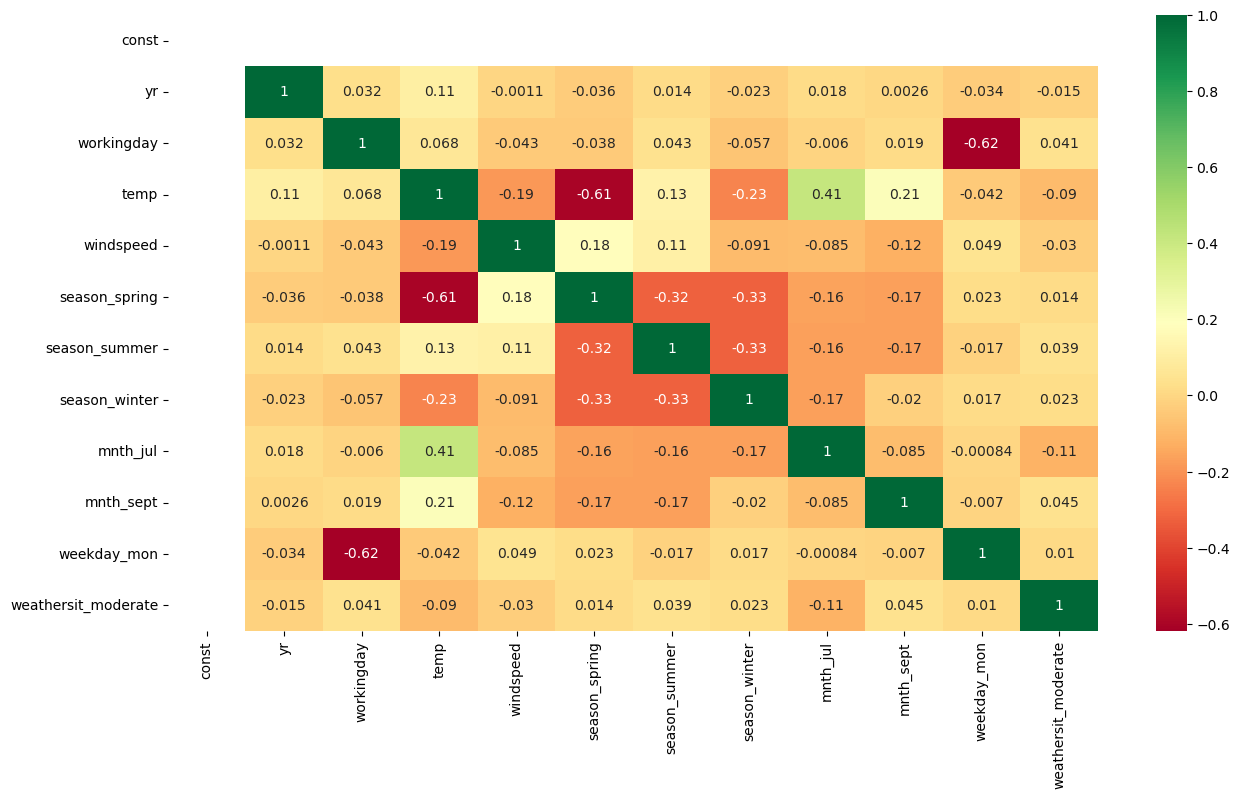

In [1639]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_new4.corr(),annot = True, cmap="RdYlGn")
plt.show()

<font color='green' size="6"> Step 6: Residual Analysis of the train data</font>

In [1640]:
y_train_pred= lm.predict(X_train_new4)

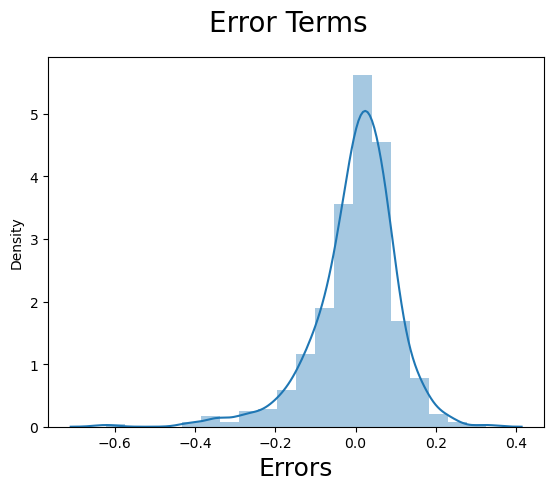

In [1641]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label
plt.show()

<font color='green' size="6"> Step 7: Making Predictions Using the Final Model</font>

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions

### Rescalling the test set

In [1643]:
num_vars = ['cnt','hum','windspeed','temp','atemp']

df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [1644]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sept,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_good,weathersit_moderate
184,0,1,0,0.837241,0.778767,0.534223,0.149393,0.704300,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.911423,0.855132,0.470417,0.231142,0.725421,0,1,...,0,0,0,0,0,0,0,0,1,0
299,0,0,1,0.496221,0.492359,0.777843,0.443398,0.278853,0,0,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.890387,0.805661,0.236659,0.449707,0.545512,0,0,...,0,0,0,0,0,0,0,0,1,0
152,0,0,1,0.821739,0.749249,0.070765,0.682387,0.569148,0,1,...,0,0,0,1,0,0,0,0,1,0


In [1645]:
y_test = df_test.pop('cnt')
X_test = df_test

In [1646]:
col1 = X_train_new4.columns

X_test = X_test[col1[1:]]

# Adding constant variable to test dataframe
X_test_sm = sm.add_constant(X_test)

In [1647]:
y_test_pred = lm.predict(X_test_sm)

### getting r2 for test data

In [1648]:
r2_score(y_test, y_test_pred)


0.7631573648424679

In [1650]:
r2 = r2_score(y_train, y_train_pred)
r2

0.7953202215210158

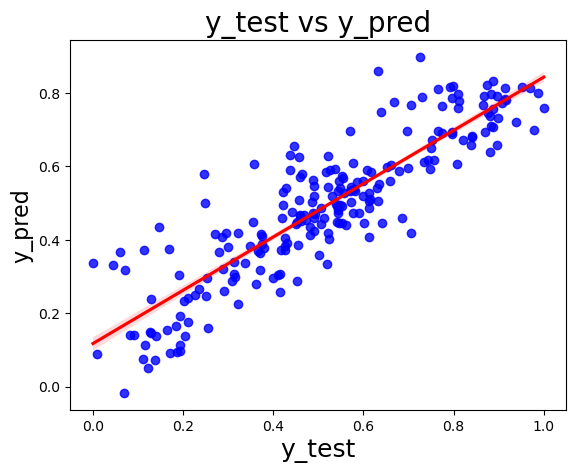

In [1655]:
plt.figure()
sns.regplot(x=y_test, y=y_test_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

In [1657]:
X_train_new4.columns

Index(['const', 'yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_jul', 'mnth_sept',
       'weekday_mon', 'weathersit_moderate'],
      dtype='object')

# 

<font color='green' size="6">Conclusion</font>


Significant variables to predict the demand for shared bikes

- windspeed
- Temp is the most significant with the largest coefficient.
- workingday
- windspeed
- Season
- months(Jan, July, September)
- Year
- Monday
- weathersit( moderate)